In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from atusfunclib import load_data
from activitylib import ACTINFO
import wlmetrics as wlm

In [5]:
# Import all data
data_import = load_data(loc='data')

In [6]:
# Unpack individual dataframes
df, dfactcodes, dfeducodes, dfinccodes, dfagecodes, \
dfempcodes, dfindcodes, dfraccodes, dfloccodes, dfwhocodes, \
dfdemocodes = data_import

In [7]:
# Convert category columns to float
df['TEAGE_CAT'] = df['TEAGE_CAT'].astype(float)
df['TRERNWA_CAT'] = df['TRERNWA_CAT'].astype(float)

### Metrics to calculate
1. Weighted `sum(life) - sum(paid work)`
1. Weighted `sum(life) - sum(upaid work)`
1. % of day spent on Personal Care
1. % of day spent on Leisure
1. More than 9h work a day
1. More than 4h childcare and housework
1. Average time Career, Social, Financial, Physical, and Community (?)

In [8]:
# Weights for ratio calculation
weights_p = np.array([0.1, 0.2, 1.0, 0.6, 0.6, 1.0, 1.0, 0.9, 1.0, 1.0, 1.0, 1.0, 0.2])
weights_n_occ = np.array([0.0, 1.0, 0.8, 1.0])
weights_n_hom = np.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 0.8])

In [10]:
df['metric1'] = wlm.w_l_balance_weighted_ratio(df,
                                               ACTINFO['positiveWL'], ACTINFO['negoccWL'],
                                               weights_p, weights_n_occ)

In [11]:
df['metric2'] = wlm.w_l_balance_weighted_ratio(df,
                                               ACTINFO['positiveWL'], ACTINFO['neghomeWL'],
                                               weights_p, weights_n_hom)

In [12]:
df['metric3'] = wlm.w_l_balance_personalcare(df)

In [13]:
df['metric4'] = wlm.w_l_balance_leisuresocial(df)

In [14]:
df['metric5'] = wlm.w_l_balance_workday(df, workid='0501', hours=9)

In [15]:
df['metric6'] = wlm.w_l_balance_housework(df, hours=4)

In [17]:
df.filter(like="metric").head()

,metric1,metric2,metric3,metric4,metric5,metric6
0,0.714035,0.709964,0.635417,0.364583,False,False
1,0.759298,0.734520,0.534722,0.409722,False,False
2,0.665614,0.570107,0.496528,0.236111,False,True
3,0.590526,0.524555,0.541667,0.184028,False,True
4,0.407193,0.535053,0.383333,0.083333,False,False


### Visualize and describe metrics

In [18]:
# Split by weekday and weekend/holiday
df_wehol = df[(df['TRHOLIDAY'] == 1) | (df['TRWEEKEND'] == 1)]
df_weday = df[(df['TRHOLIDAY'] == 0) & (df['TRWEEKEND'] == 0)]

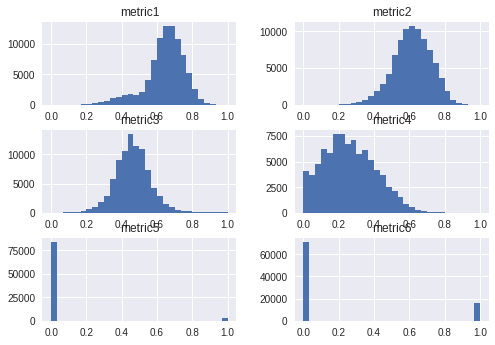

In [19]:
df_wehol.filter(like="metric").hist(bins=30);

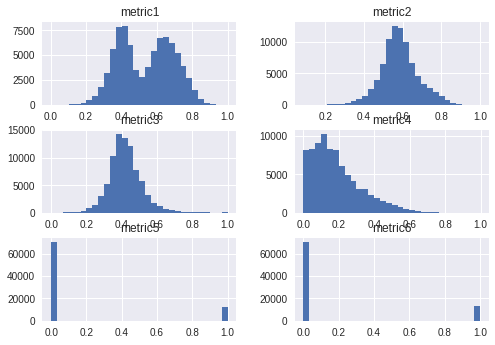

In [20]:
df_weday.filter(like="metric").hist(bins=30);

In [21]:
df_wehol.filter(like="metric").describe()

,metric1,metric2,metric3,metric4
count,87293.000000,87293.000000,87293.000000,87293.000000
mean,0.644157,0.615790,0.463272,0.262764
std,0.114342,0.108573,0.105343,0.148793
min,0.000000,0.000000,0.000000,0.000000
25%,0.597368,0.546975,0.399306,0.149306
50%,0.659298,0.618861,0.458333,0.250000
75%,0.718246,0.691459,0.520833,0.364583
max,1.000000,1.000000,1.000000,0.999306


In [22]:
df_weday.filter(like="metric").describe()

,metric1,metric2,metric3,metric4
count,83549.000000,83549.000000,83549.000000,83549.000000
mean,0.537947,0.583468,0.421443,0.188019
std,0.154299,0.098952,0.097816,0.141352
min,0.003509,0.086477,0.000000,0.000000
25%,0.404737,0.525801,0.364583,0.083333
50%,0.547544,0.578648,0.415278,0.156250
75%,0.665263,0.638078,0.468750,0.263194
max,1.000000,1.000000,1.000000,0.995833


In [23]:
df_wehol[['metric4', 'metric5']].mean()

metric4    0.262764
metric5    0.034482
dtype: float64

In [24]:
df_weday[['metric4', 'metric5']].mean()

metric4    0.188019
metric5    0.152928
dtype: float64

### Output metrics to csv file

In [25]:
df_wehol.filter(like="metric").to_csv('data-results/wehol_metrics.csv', index_label='idx')

In [26]:
df_weday.filter(like="metric").to_csv('data-results/weday_metrics.csv', index_label='idx')